In [58]:
import re

string = '''
'prostate gland','leukocyte',1618,
'urethra','luminal cell of prostate epithelium',1656,
'prostate gland','luminal cell of prostate epithelium',20327,
'urethra','basal cell of prostate epithelium',4426,
'prostate gland','basal cell of prostate epithelium',5208,
'urethra','urethra urothelial cell',6229,
'urethra','seminal vesicle glandular cell',2889,
'prostate gland','seminal vesicle glandular cell',1344,
'islet of Langerhans','type B pancreatic cell',11923,
'islet of Langerhans','pancreatic A cell',11541,
'islet of Langerhans','pancreatic D cell',2889,
'aorta','fibroblast',2824,
'adipose tissue','fibroblast',3892,
'endometrium','fibroblast',2520,
'coronary artery','fibroblast',1906,
'parotid gland','fibroblast',1626,
'vasculature','fibroblast',1137,
'subcutaneous adipose tissue','fibroblast',4567,
'thymus','fibroblast',3924,
'trachea','fibroblast',1239,
'bladder organ','fibroblast',5557,
'prostate gland','epithelial cell',6848,
'anterior part of tongue','epithelial cell',2114,
'lymph node','T cell',3509,
'adipose tissue','T cell',1005,
'mammary gland','T cell',2324,
'bladder organ','T cell',2916,
'bladder organ','mast cell',1029,
'exocrine pancreas','endothelial cell',1927,
'aorta','endothelial cell',1549,
'adipose tissue','endothelial cell',1964,
'myometrium','endothelial cell',1972,
'subcutaneous adipose tissue','endothelial cell',1784,
'adipose tissue','mesenchymal stem cell',1310,
'muscle of abdomen','mesenchymal stem cell',3787,
'rectus abdominis muscle','mesenchymal stem cell',5896,
'muscle tissue','mesenchymal stem cell',1357,
'muscle of pelvic diaphragm','mesenchymal stem cell',3108,
'lung','club cell',1038,
'prostate gland','club cell',1078,
'liver','hepatocyte',1558,
'bladder organ','myofibroblast cell',2078,
'aorta','smooth muscle cell',1232,
'coronary artery','smooth muscle cell',1273,
'blood','erythrocyte',10484,
'lymph node','macrophage',1144,
'aorta','macrophage',1907,
'adipose tissue','macrophage',1293,
'parotid gland','macrophage',1124,
'lung','macrophage',12160,
'spleen','macrophage',1335,
'liver','macrophage',1381,
'subcutaneous adipose tissue','macrophage',1514,
'bladder organ','macrophage',5338,
'lymph node','B cell',9314,
'inguinal lymph node','B cell',5935,
'thymus','B cell',1919,
'anterior part of tongue','keratinocyte',1764,
'posterior part of tongue','keratinocyte',1898,
'thymus','vascular associated smooth muscle cell',2130,
'parotid gland','CD4-positive helper T cell',1221,
'thymus','CD4-positive helper T cell',7611,
'skin of body','stromal cell',1448,
'cornea','corneal epithelial cell',1445,
'blood','monocyte',8972,
'bone marrow','monocyte',1389,
'large intestine','enterocyte',1464,
'large intestine','CD4-positive, alpha-beta T cell',2872,
'blood','CD4-positive, alpha-beta T cell',2863,
'small intestine','CD4-positive, alpha-beta T cell',5257,
'bone marrow','CD4-positive, alpha-beta T cell',2025,
'large intestine','CD8-positive, alpha-beta T cell',2147,
'blood','CD8-positive, alpha-beta T cell',1322,
'parotid gland','CD8-positive, alpha-beta T cell',1979,
'small intestine','CD8-positive, alpha-beta T cell',2323,
'prostate gland','CD8-positive, alpha-beta T cell',1081,
'bone marrow','CD8-positive, alpha-beta T cell',1147,
'lung','basal cell',2188,
'trachea','basal cell',4198,
'posterior part of tongue','basal cell',5497,
'posterior part of tongue','leukocyte',1574,
'cardiac atrium','cardiac muscle cell',5327,
'cardiac ventricle','cardiac muscle cell',1878,
'exocrine pancreas','myeloid cell',1805,
'blood','neutrophil',8456,
'spleen','neutrophil',4539,
'bone marrow','neutrophil',2911,
'lymph node','plasma cell',2555,
'spleen','plasma cell',3171,
'thymus','plasma cell',1554,
'bladder organ','plasma cell',1141,
'lymph node','memory B cell',3211,
'parotid gland','memory B cell',2879,
'spleen','memory B cell',6460,
'thymus','memory B cell',1845,
'lymph node','naive B cell',1330,
'blood','naive B cell',2239,
'parotid gland','naive B cell',1120,
'spleen','naive B cell',1044,
'thymus','DN3 thymocyte',1788,
'blood','mature NK T cell',2948,
'spleen','mature NK T cell',2439,
'blood','classical monocyte',7211,
'lung','classical monocyte',1487,
'spleen','classical monocyte',4443,
'lung','non-classical monocyte',1005,
'lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',1439,
'spleen','naive thymus-derived CD4-positive, alpha-beta T cell',1261,
'lymph node','CD4-positive, alpha-beta memory T cell',1368,
'spleen','CD4-positive, alpha-beta memory T cell',1771,
'blood','CD8-positive, alpha-beta cytokine secreting effector T cell',1493,
'spleen','CD8-positive, alpha-beta memory T cell',4301,
'lymph node','type I NK T cell',3463,
'spleen','type I NK T cell',1038,
'lymph node','effector CD4-positive, alpha-beta T cell',6197,
'lymph node','effector CD8-positive, alpha-beta T cell',5514,
'lymph node','innate lymphoid cell',1982,
'thymus','innate lymphoid cell',2594,
'lung','type II pneumocyte',9146,
'exocrine pancreas','pancreatic acinar cell',5092,
'large intestine','enterocyte of epithelium of large intestine',2764,
'exocrine pancreas','pancreatic ductal cell',1892,
'rectus abdominis muscle','endothelial cell of vascular tree',1085,
'muscle of pelvic diaphragm','endothelial cell of vascular tree',1809,
'lung','capillary endothelial cell',1534,
'thymus','capillary endothelial cell',1362,
'mammary gland','luminal epithelial cell of mammary gland',5378,
'prostate gland','luminal cell of prostate epithelium',1092,
'prostate gland','basal cell of prostate epithelium',3298,
'kidney','kidney epithelial cell',8331,
'thymus','vein endothelial cell',2104,
'submandibular gland','acinar cell of salivary gland',2095,
'parotid gland','acinar cell of salivary gland',8052,
'muscle of abdomen','skeletal muscle satellite stem cell',1113,
'rectus abdominis muscle','skeletal muscle satellite stem cell',2101,
'muscle of pelvic diaphragm','skeletal muscle satellite stem cell',1196,
'cardiac atrium','cardiac endothelial cell',1860,
'small intestine','enterocyte of epithelium of small intestine',1100,
'cornea','conjunctival epithelial cell',1275,
'eye','conjunctival epithelial cell',1169,
'conjunctiva','conjunctival epithelial cell',2078,
'bladder organ','bladder urothelial cell',4151,
'mammary gland','fibroblast of breast',2066,
'limb muscle','T cell',1254,
'limb muscle','endothelial cell',6894,
'limb muscle','mesenchymal stem cell',13037,
'limb muscle','smooth muscle cell',1165,
'limb muscle','macrophage',2485,
'limb muscle','B cell',1511,
'limb muscle','skeletal muscle satellite cell',2055,
'lung parenchyma','epithelial cell of lung',3529,
'respiratory airway','mast cell',1684,
'lung parenchyma','mast cell',4754,
'nose','club cell',25629,
'respiratory airway','club cell',9661,
'lung parenchyma','club cell',2821,
'respiratory airway','B cell',1930,
'lung parenchyma','B cell',2415,
'nose','serous secreting cell',1460,
'respiratory airway','alveolar macrophage',5383,
'lung parenchyma','alveolar macrophage',73414,
'respiratory airway','acinar cell',1008,
'respiratory airway','natural killer cell',2032,
'lung parenchyma','natural killer cell',14878,
'respiratory airway','CD4-positive, alpha-beta T cell',5298,
'lung parenchyma','CD4-positive, alpha-beta T cell',15702,
'nose','CD8-positive, alpha-beta T cell',1450,
'respiratory airway','CD8-positive, alpha-beta T cell',12692,
'lung parenchyma','CD8-positive, alpha-beta T cell',14932,
'lung parenchyma','pericyte',2248,
'lung parenchyma','plasma cell',1255,
'respiratory airway','classical monocyte',2086,
'lung parenchyma','classical monocyte',15454,
'respiratory airway','elicited macrophage',2117,
'lung parenchyma','elicited macrophage',26057,
'lung parenchyma','non-classical monocyte',8415,
'lung parenchyma','type I pneumocyte',7411,
'respiratory airway','type II pneumocyte',1979,
'lung parenchyma','type II pneumocyte',60196,
'lung parenchyma','endothelial cell of lymphatic vessel',4361,
'nose','ciliated columnar cell of tracheobronchial tree',4597,
'respiratory airway','ciliated columnar cell of tracheobronchial tree',20448,
'lung parenchyma','ciliated columnar cell of tracheobronchial tree',10180,
'nose','CD1c-positive myeloid dendritic cell',1083,
'respiratory airway','CD1c-positive myeloid dendritic cell',2427,
'lung parenchyma','CD1c-positive myeloid dendritic cell',5623,
'nose','nasal mucosa goblet cell',33183,
'respiratory airway','nasal mucosa goblet cell',2536,
'respiratory airway','vein endothelial cell',4917,
'lung parenchyma','vein endothelial cell',7910,
'respiratory airway','fibroblast of lung',1401,
'lung parenchyma','fibroblast of lung',14088,
'nose','respiratory basal cell',3651,
'respiratory airway','respiratory basal cell',80421,
'nose','multi-ciliated epithelial cell',5157,
'respiratory airway','tracheobronchial serous cell',1404,
'respiratory airway','tracheobronchial smooth muscle cell',1052,
'lung parenchyma','tracheobronchial smooth muscle cell',1939,
'respiratory airway','bronchial goblet cell',1592,
'lung parenchyma','pulmonary artery endothelial cell',6866,
'lung parenchyma','lung macrophage',4604,
'respiratory airway','bronchus fibroblast of lung',1244,
'respiratory airway','alveolar capillary type 2 endothelial cell',1276,
'lung parenchyma','alveolar capillary type 2 endothelial cell',5881,
'respiratory airway','alveolar capillary type 1 endothelial cell',1719,
'lung parenchyma','alveolar capillary type 1 endothelial cell',14329,
'heart right ventricle','endothelial cell',30469,
'heart left ventricle','endothelial cell',53224,
'interventricular septum','endothelial cell',30300,
'apex of heart','endothelial cell',1555,
'heart right ventricle','fat cell',1468,
'heart right ventricle','lymphocyte',5514,
'heart left ventricle','lymphocyte',7106,
'interventricular septum','lymphocyte',3805,
'heart right ventricle','cardiac muscle cell',77216,
'heart left ventricle','cardiac muscle cell',151583,
'interventricular septum','cardiac muscle cell',70736,
'apex of heart','cardiac muscle cell',11883,
'heart right ventricle','myeloid cell',15659,
'heart left ventricle','myeloid cell',27619,
'interventricular septum','myeloid cell',13372,
'heart right ventricle','fibroblast of cardiac tissue',39694,
'heart left ventricle','fibroblast of cardiac tissue',65102,
'interventricular septum','fibroblast of cardiac tissue',36301,
'apex of heart','fibroblast of cardiac tissue',1719,
'heart right ventricle','mural cell',42375,
'heart left ventricle','mural cell',82552,
'interventricular septum','mural cell',38502,
'apex of heart','mural cell',6852,
'heart right ventricle','cardiac neuron',2758,
'heart left ventricle','cardiac neuron',4478,
'interventricular septum','cardiac neuron',2152,
'heart right ventricle','native cell',15080,
'heart left ventricle','native cell',25857,
'interventricular septum','native cell',11071,
'mucosa','fibroblast',2848,
'esophagus muscularis mucosa','fibroblast',10580,
'lingula of left lung','fibroblast',1483,
'anterior wall of left ventricle','fibroblast',8990,
'mucosa','squamous epithelial cell',2770,
'mucosa','T cell',1620,
'anterior wall of left ventricle','professional antigen presenting cell',3043,
'anterior wall of left ventricle','contractile cell',2459,
'gastrocnemius','fast muscle cell',1581,
'esophagus muscularis mucosa','smooth muscle cell',4385,
'esophagus muscularis mucosa','macrophage',1679,
'anterior wall of left ventricle','macrophage',3062,
'lingula of left lung','alveolar macrophage',5229,
'mucosa','basal cell',2399,
'anterior wall of left ventricle','cardiac muscle cell',9619,
'mucosa','endothelial cell of lymphatic vessel',1549,
'esophagus muscularis mucosa','endothelial cell of lymphatic vessel',1210,
'mucosa','endothelial cell of vascular tree',3136,
'gastrocnemius','endothelial cell of vascular tree',1117,
'prostate gland','endothelial cell of vascular tree',2600,
'esophagus muscularis mucosa','endothelial cell of vascular tree',3275,
'lingula of left lung','endothelial cell of vascular tree',2437,
'anterior wall of left ventricle','endothelial cell of vascular tree',6846,
'skin of leg','basal cell of epidermis',1815,
'prostate gland','epithelial cell of prostate',4587,
'prostate gland','basal epithelial cell of prostatic duct',7295,
'breast','luminal epithelial cell of mammary gland',5546,
'mucosa','basal epithelial cell of tracheobronchial tree',8145,
'prostate gland','luminal cell of prostate epithelium',11104,
'esophagus muscularis mucosa','enteric smooth muscle cell',9159,
'breast','subcutaneous fat cell',1756,
'prostate gland','skin fibroblast',1139,
'lingula of left lung','respiratory basal cell',1062,
'gastrocnemius','skeletal muscle fiber',19491,
'lingula of left lung','epithelial cell of alveolus of lung',22305,
'gastrocnemius','skeletal muscle fibroblast',5913,
'prostate gland','smooth muscle cell of prostate',2006,
'liver','CD16-negative, CD56-bright natural killer cell, human',1705,
'spleen','CD16-negative, CD56-bright natural killer cell, human',3891,
'blood','CD16-positive, CD56-dim natural killer cell, human',3539,
'bone marrow','CD16-positive, CD56-dim natural killer cell, human',7394,
'liver','CD16-positive, CD56-dim natural killer cell, human',1882,
'lung','CD16-positive, CD56-dim natural killer cell, human',2771,
'spleen','CD16-positive, CD56-dim natural killer cell, human',4319,
'jejunal epithelium','CD4-positive helper T cell',3333,
'lamina propria','CD4-positive helper T cell',7699,
'lung','CD4-positive helper T cell',1876,
'jejunal epithelium','CD8-positive, alpha-beta memory T cell',15907,
'lamina propria','CD8-positive, alpha-beta memory T cell',7072,
'spleen','CD8-positive, alpha-beta memory T cell',1023,
'bone marrow','CD8-positive, alpha-beta memory T cell, CD45RO-positive',2895,
'spleen','CD8-positive, alpha-beta memory T cell, CD45RO-positive',4984,
'thoracic lymph node','CD8-positive, alpha-beta memory T cell, CD45RO-positive',1655,
'mesenteric lymph node','T follicular helper cell',2672,
'spleen','T follicular helper cell',4371,
'thoracic lymph node','T follicular helper cell',7677,
'thoracic lymph node','alpha-beta T cell',1412,
'lung','alveolar macrophage',16976,
'bone marrow','animal cell',1102,
'lung','animal cell',1523,
'blood','classical monocyte',5850,
'bone marrow','classical monocyte',5032,
'liver','classical monocyte',1495,
'lung','classical monocyte',3380,
'spleen','classical monocyte',5714,
'blood','effector memory CD4-positive, alpha-beta T cell',4331,
'bone marrow','effector memory CD4-positive, alpha-beta T cell',2637,
'spleen','effector memory CD4-positive, alpha-beta T cell',3837,
'thoracic lymph node','effector memory CD4-positive, alpha-beta T cell',6696,
'blood','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',1983,
'bone marrow','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',6684,
'spleen','effector memory CD8-positive, alpha-beta T cell, terminally differentiated',3127,
'bone marrow','gamma-delta T cell',1028,
'jejunal epithelium','gamma-delta T cell',5288,
'lamina propria','gamma-delta T cell',1318,
'liver','gamma-delta T cell',1043,
'spleen','gamma-delta T cell',2104,
'lung','macrophage',2221,
'spleen','macrophage',1096,
'lamina propria','mast cell',2123,
'mesenteric lymph node','memory B cell',3690,
'spleen','memory B cell',14655,
'thoracic lymph node','memory B cell',10125,
'liver','mucosal invariant T cell',2239,
'spleen','mucosal invariant T cell',1519,
'mesenteric lymph node','naive B cell',1555,
'spleen','naive B cell',6646,
'thoracic lymph node','naive B cell',4503,
'blood','naive thymus-derived CD4-positive, alpha-beta T cell',6609,
'bone marrow','naive thymus-derived CD4-positive, alpha-beta T cell',4590,
'mesenteric lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',5121,
'spleen','naive thymus-derived CD4-positive, alpha-beta T cell',4951,
'thoracic lymph node','naive thymus-derived CD4-positive, alpha-beta T cell',15645,
'blood','naive thymus-derived CD8-positive, alpha-beta T cell',1182,
'mesenteric lymph node','naive thymus-derived CD8-positive, alpha-beta T cell',1187,
'thoracic lymph node','naive thymus-derived CD8-positive, alpha-beta T cell',3653,
'lamina propria','plasma cell',2942,
'spleen','plasma cell',1992,
'bone marrow','progenitor cell',1312,
'mesenteric lymph node','regulatory T cell',2965,
'spleen','regulatory T cell',1643,
'thoracic lymph node','regulatory T cell',5806,
'blood','CD14-low, CD16-positive monocyte',1923,
'blood','CD14-positive monocyte',23648,
'blood','CD16-negative, CD56-bright natural killer cell, human',3638,
'blood','CD16-positive, CD56-dim natural killer cell, human',6948,
'blood','CD4-positive, alpha-beta memory T cell',3276,
'blood','CD8-positive, alpha-beta memory T cell',6224,
'blood','T cell',1697,
'blood','erythrocyte',3907,
'blood','mature NK T cell',1807,
'blood','naive B cell',8679,
'blood','naive thymus-derived CD4-positive, alpha-beta T cell',26887,
'blood','naive thymus-derived CD8-positive, alpha-beta T cell',2387,
'blood','plasmablast',1239,
'blood','platelet',1444,
'''

tissue_list = []
cell_type_list = []
cell_number_list = []

pattern = r"'([^']*)','([^']*)',(\d+),"

matches = re.findall(pattern, string)

for match in matches:
    tissue_list.append(match[0])
    cell_type_list.append(match[1])
    cell_number_list.append(int(match[2]))

print((tissue_list))
print((cell_type_list))
print((cell_number_list))



['prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'urethra', 'prostate gland', 'islet of Langerhans', 'islet of Langerhans', 'islet of Langerhans', 'aorta', 'adipose tissue', 'endometrium', 'coronary artery', 'parotid gland', 'vasculature', 'subcutaneous adipose tissue', 'thymus', 'trachea', 'bladder organ', 'prostate gland', 'anterior part of tongue', 'lymph node', 'adipose tissue', 'mammary gland', 'bladder organ', 'bladder organ', 'exocrine pancreas', 'aorta', 'adipose tissue', 'myometrium', 'subcutaneous adipose tissue', 'adipose tissue', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'lung', 'prostate gland', 'liver', 'bladder organ', 'aorta', 'coronary artery', 'blood', 'lymph node', 'aorta', 'adipose tissue', 'parotid gland', 'lung', 'spleen', 'liver', 'subcutaneous adipose tissue', 'bladder organ', 'lymph node', 'inguinal lymph node', 'thymus', 'anterior part of tongue', 'posterior part of ton

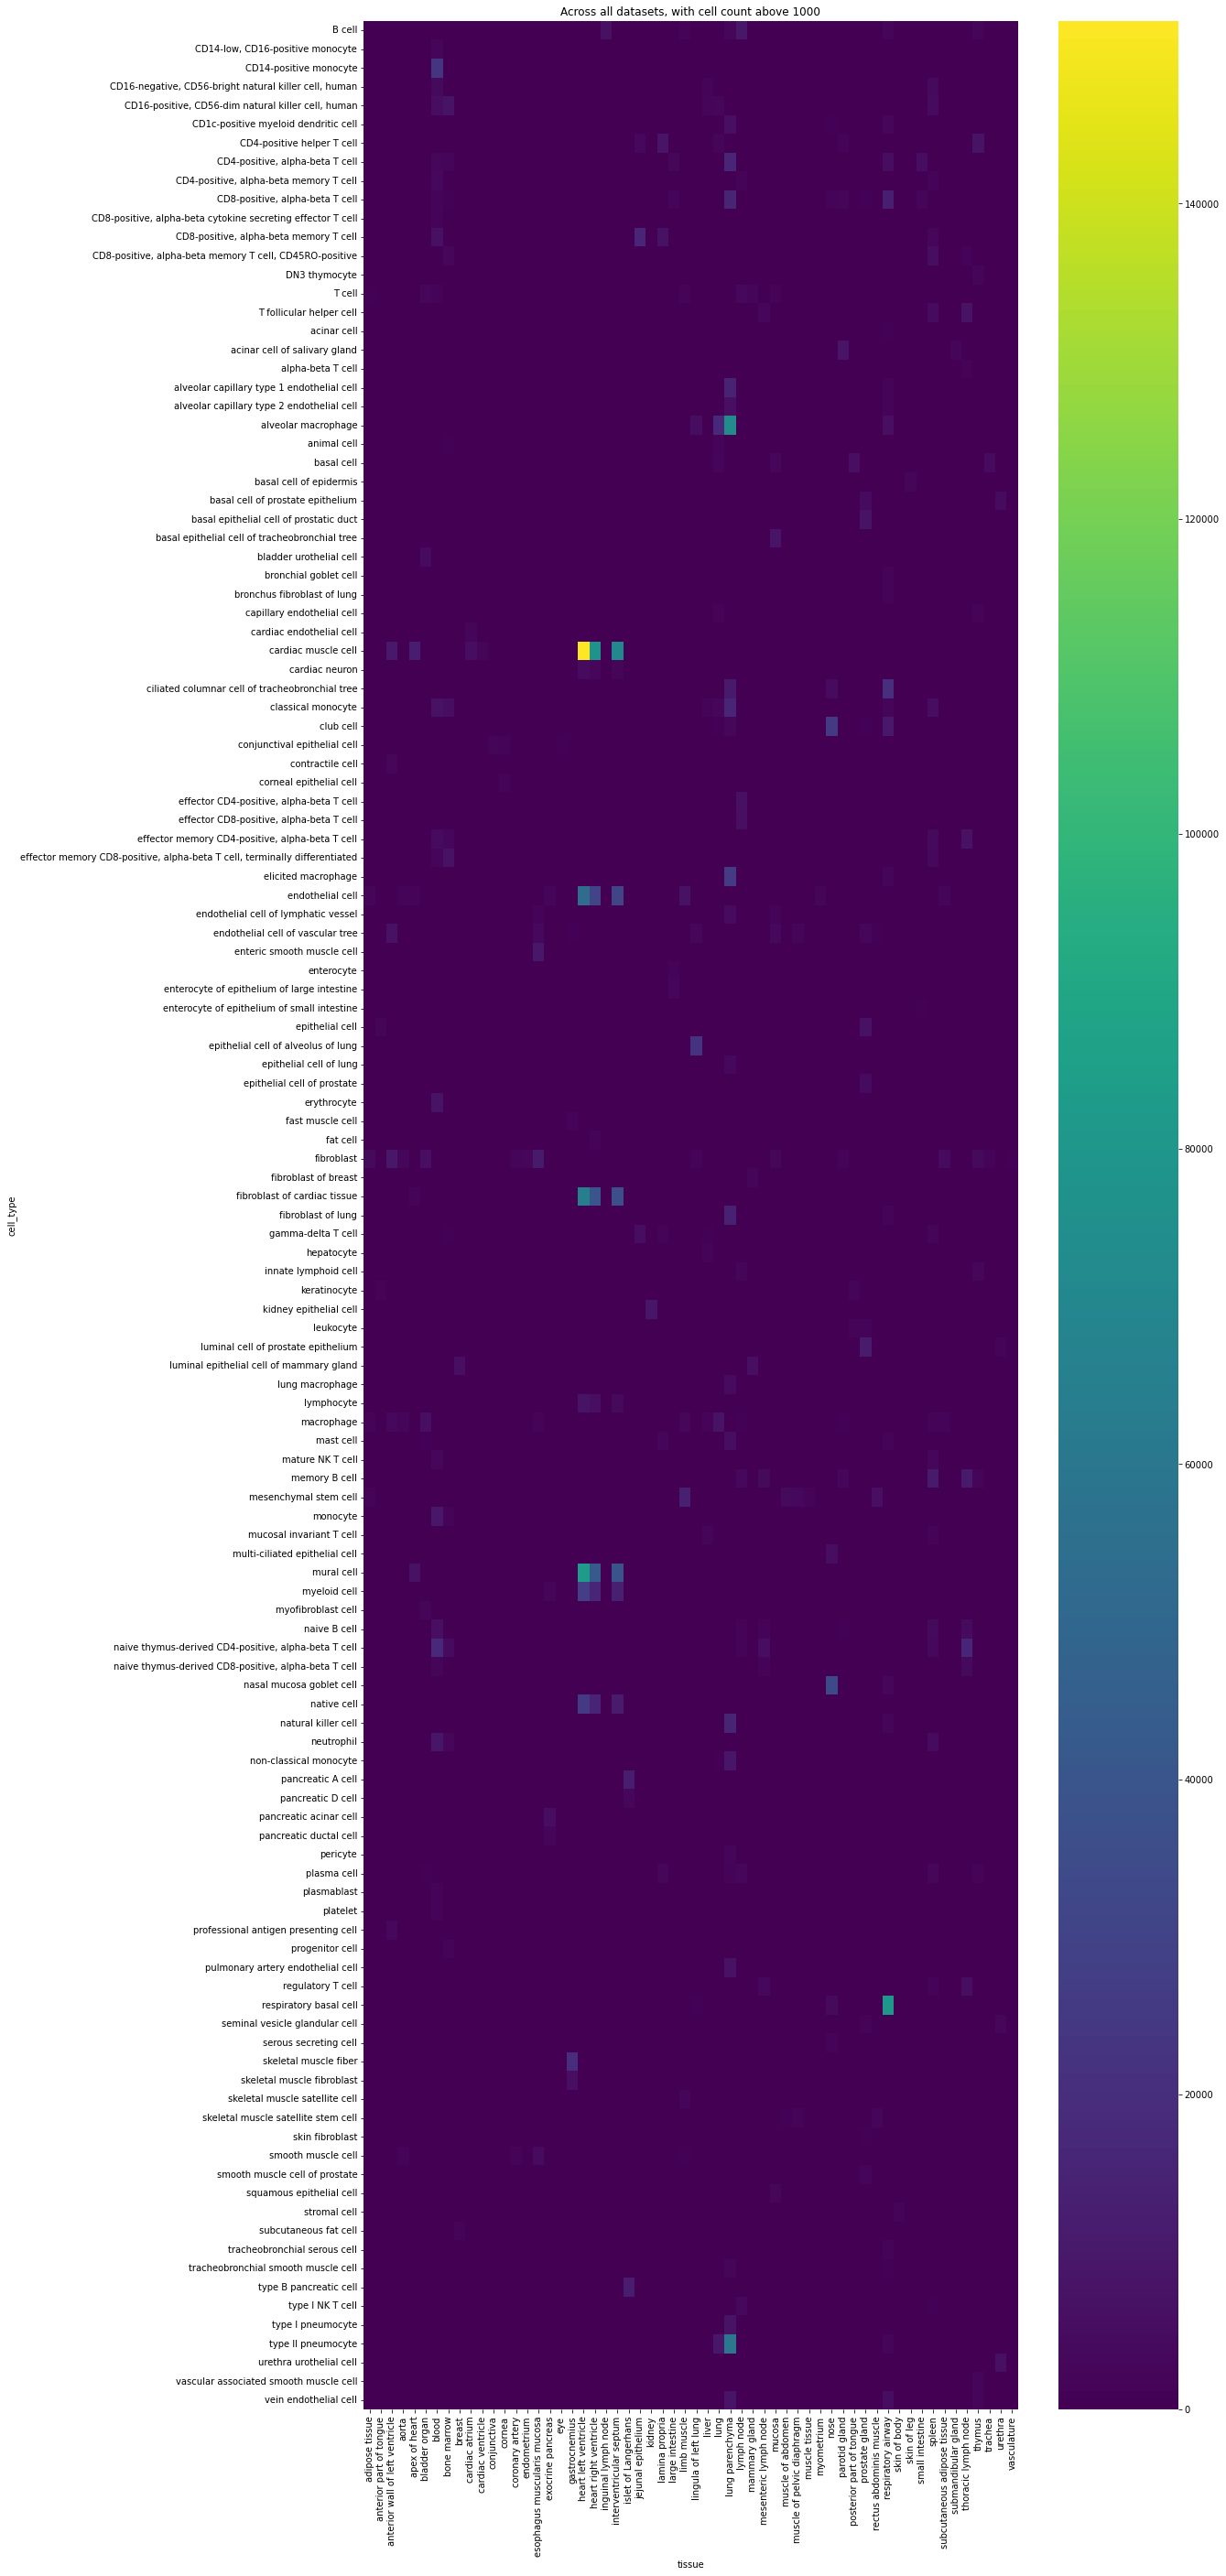

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO

df = pd.DataFrame({
    'tissue': ['prostate gland', 'urethra', 'prostate gland', 'urethra', 'prostate gland', 'urethra', 'urethra', 'prostate gland', 'islet of Langerhans', 'islet of Langerhans', 'islet of Langerhans', 'aorta', 'adipose tissue', 'endometrium', 'coronary artery', 'parotid gland', 'vasculature', 'subcutaneous adipose tissue', 'thymus', 'trachea', 'bladder organ', 'prostate gland', 'anterior part of tongue', 'lymph node', 'adipose tissue', 'mammary gland', 'bladder organ', 'bladder organ', 'exocrine pancreas', 'aorta', 'adipose tissue', 'myometrium', 'subcutaneous adipose tissue', 'adipose tissue', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle tissue', 'muscle of pelvic diaphragm', 'lung', 'prostate gland', 'liver', 'bladder organ', 'aorta', 'coronary artery', 'blood', 'lymph node', 'aorta', 'adipose tissue', 'parotid gland', 'lung', 'spleen', 'liver', 'subcutaneous adipose tissue', 'bladder organ', 'lymph node', 'inguinal lymph node', 'thymus', 'anterior part of tongue', 'posterior part of tongue', 'thymus', 'parotid gland', 'thymus', 'skin of body', 'cornea', 'blood', 'bone marrow', 'large intestine', 'large intestine', 'blood', 'small intestine', 'bone marrow', 'large intestine', 'blood', 'parotid gland', 'small intestine', 'prostate gland', 'bone marrow', 'lung', 'trachea', 'posterior part of tongue', 'posterior part of tongue', 'cardiac atrium', 'cardiac ventricle', 'exocrine pancreas', 'blood', 'spleen', 'bone marrow', 'lymph node', 'spleen', 'thymus', 'bladder organ', 'lymph node', 'parotid gland', 'spleen', 'thymus', 'lymph node', 'blood', 'parotid gland', 'spleen', 'thymus', 'blood', 'spleen', 'blood', 'lung', 'spleen', 'lung', 'lymph node', 'spleen', 'lymph node', 'spleen', 'blood', 'spleen', 'lymph node', 'spleen', 'lymph node', 'lymph node', 'lymph node', 'thymus', 'lung', 'exocrine pancreas', 'large intestine', 'exocrine pancreas', 'rectus abdominis muscle', 'muscle of pelvic diaphragm', 'lung', 'thymus', 'mammary gland', 'prostate gland', 'prostate gland', 'kidney', 'thymus', 'submandibular gland', 'parotid gland', 'muscle of abdomen', 'rectus abdominis muscle', 'muscle of pelvic diaphragm', 'cardiac atrium', 'small intestine', 'cornea', 'eye', 'conjunctiva', 'bladder organ', 'mammary gland', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'limb muscle', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'lung parenchyma', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'lung parenchyma', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'nose', 'respiratory airway', 'nose', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'lung parenchyma', 'respiratory airway', 'respiratory airway', 'lung parenchyma', 'respiratory airway', 'lung parenchyma', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'apex of heart', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'heart right ventricle', 'heart left ventricle', 'interventricular septum', 'mucosa', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'mucosa', 'mucosa', 'anterior wall of left ventricle', 'anterior wall of left ventricle', 'gastrocnemius', 'esophagus muscularis mucosa', 'esophagus muscularis mucosa', 'anterior wall of left ventricle', 'lingula of left lung', 'mucosa', 'anterior wall of left ventricle', 'mucosa', 'esophagus muscularis mucosa', 'mucosa', 'gastrocnemius', 'prostate gland', 'esophagus muscularis mucosa', 'lingula of left lung', 'anterior wall of left ventricle', 'skin of leg', 'prostate gland', 'prostate gland', 'breast', 'mucosa', 'prostate gland', 'esophagus muscularis mucosa', 'breast', 'prostate gland', 'lingula of left lung', 'gastrocnemius', 'lingula of left lung', 'gastrocnemius', 'prostate gland', 'liver', 'spleen', 'blood', 'bone marrow', 'liver', 'lung', 'spleen', 'jejunal epithelium', 'lamina propria', 'lung', 'jejunal epithelium', 'lamina propria', 'spleen', 'bone marrow', 'spleen', 'thoracic lymph node', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'thoracic lymph node', 'lung', 'bone marrow', 'lung', 'blood', 'bone marrow', 'liver', 'lung', 'spleen', 'blood', 'bone marrow', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'spleen', 'bone marrow', 'jejunal epithelium', 'lamina propria', 'liver', 'spleen', 'lung', 'spleen', 'lamina propria', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'liver', 'spleen', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'bone marrow', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'mesenteric lymph node', 'thoracic lymph node', 'lamina propria', 'spleen', 'bone marrow', 'mesenteric lymph node', 'spleen', 'thoracic lymph node', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood', 'blood']
,

    'cell_type': ['leukocyte', 'luminal cell of prostate epithelium', 'luminal cell of prostate epithelium', 'basal cell of prostate epithelium', 'basal cell of prostate epithelium', 'urethra urothelial cell', 'seminal vesicle glandular cell', 'seminal vesicle glandular cell', 'type B pancreatic cell', 'pancreatic A cell', 'pancreatic D cell', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'epithelial cell', 'epithelial cell', 'T cell', 'T cell', 'T cell', 'T cell', 'mast cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'mesenchymal stem cell', 'club cell', 'club cell', 'hepatocyte', 'myofibroblast cell', 'smooth muscle cell', 'smooth muscle cell', 'erythrocyte', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'macrophage', 'B cell', 'B cell', 'B cell', 'keratinocyte', 'keratinocyte', 'vascular associated smooth muscle cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'stromal cell', 'corneal epithelial cell', 'monocyte', 'monocyte', 'enterocyte', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'basal cell', 'basal cell', 'basal cell', 'leukocyte', 'cardiac muscle cell', 'cardiac muscle cell', 'myeloid cell', 'neutrophil', 'neutrophil', 'neutrophil', 'plasma cell', 'plasma cell', 'plasma cell', 'plasma cell', 'memory B cell', 'memory B cell', 'memory B cell', 'memory B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive B cell', 'DN3 thymocyte', 'mature NK T cell', 'mature NK T cell', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'non-classical monocyte', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta memory T cell', 'CD4-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta cytokine secreting effector T cell', 'CD8-positive, alpha-beta memory T cell', 'type I NK T cell', 'type I NK T cell', 'effector CD4-positive, alpha-beta T cell', 'effector CD8-positive, alpha-beta T cell', 'innate lymphoid cell', 'innate lymphoid cell', 'type II pneumocyte', 'pancreatic acinar cell', 'enterocyte of epithelium of large intestine', 'pancreatic ductal cell', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'capillary endothelial cell', 'capillary endothelial cell', 'luminal epithelial cell of mammary gland', 'luminal cell of prostate epithelium', 'basal cell of prostate epithelium', 'kidney epithelial cell', 'vein endothelial cell', 'acinar cell of salivary gland', 'acinar cell of salivary gland', 'skeletal muscle satellite stem cell', 'skeletal muscle satellite stem cell', 'skeletal muscle satellite stem cell', 'cardiac endothelial cell', 'enterocyte of epithelium of small intestine', 'conjunctival epithelial cell', 'conjunctival epithelial cell', 'conjunctival epithelial cell', 'bladder urothelial cell', 'fibroblast of breast', 'T cell', 'endothelial cell', 'mesenchymal stem cell', 'smooth muscle cell', 'macrophage', 'B cell', 'skeletal muscle satellite cell', 'epithelial cell of lung', 'mast cell', 'mast cell', 'club cell', 'club cell', 'club cell', 'B cell', 'B cell', 'serous secreting cell', 'alveolar macrophage', 'alveolar macrophage', 'acinar cell', 'natural killer cell', 'natural killer cell', 'CD4-positive, alpha-beta T cell', 'CD4-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'CD8-positive, alpha-beta T cell', 'pericyte', 'plasma cell', 'classical monocyte', 'classical monocyte', 'elicited macrophage', 'elicited macrophage', 'non-classical monocyte', 'type I pneumocyte', 'type II pneumocyte', 'type II pneumocyte', 'endothelial cell of lymphatic vessel', 'ciliated columnar cell of tracheobronchial tree', 'ciliated columnar cell of tracheobronchial tree', 'ciliated columnar cell of tracheobronchial tree', 'CD1c-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'CD1c-positive myeloid dendritic cell', 'nasal mucosa goblet cell', 'nasal mucosa goblet cell', 'vein endothelial cell', 'vein endothelial cell', 'fibroblast of lung', 'fibroblast of lung', 'respiratory basal cell', 'respiratory basal cell', 'multi-ciliated epithelial cell', 'tracheobronchial serous cell', 'tracheobronchial smooth muscle cell', 'tracheobronchial smooth muscle cell', 'bronchial goblet cell', 'pulmonary artery endothelial cell', 'lung macrophage', 'bronchus fibroblast of lung', 'alveolar capillary type 2 endothelial cell', 'alveolar capillary type 2 endothelial cell', 'alveolar capillary type 1 endothelial cell', 'alveolar capillary type 1 endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'endothelial cell', 'fat cell', 'lymphocyte', 'lymphocyte', 'lymphocyte', 'cardiac muscle cell', 'cardiac muscle cell', 'cardiac muscle cell', 'cardiac muscle cell', 'myeloid cell', 'myeloid cell', 'myeloid cell', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'fibroblast of cardiac tissue', 'mural cell', 'mural cell', 'mural cell', 'mural cell', 'cardiac neuron', 'cardiac neuron', 'cardiac neuron', 'native cell', 'native cell', 'native cell', 'fibroblast', 'fibroblast', 'fibroblast', 'fibroblast', 'squamous epithelial cell', 'T cell', 'professional antigen presenting cell', 'contractile cell', 'fast muscle cell', 'smooth muscle cell', 'macrophage', 'macrophage', 'alveolar macrophage', 'basal cell', 'cardiac muscle cell', 'endothelial cell of lymphatic vessel', 'endothelial cell of lymphatic vessel', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'endothelial cell of vascular tree', 'basal cell of epidermis', 'epithelial cell of prostate', 'basal epithelial cell of prostatic duct', 'luminal epithelial cell of mammary gland', 'basal epithelial cell of tracheobronchial tree', 'luminal cell of prostate epithelium', 'enteric smooth muscle cell', 'subcutaneous fat cell', 'skin fibroblast', 'respiratory basal cell', 'skeletal muscle fiber', 'epithelial cell of alveolus of lung', 'skeletal muscle fibroblast', 'smooth muscle cell of prostate', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD4-positive helper T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'CD8-positive, alpha-beta memory T cell, CD45RO-positive', 'T follicular helper cell', 'T follicular helper cell', 'T follicular helper cell', 'alpha-beta T cell', 'alveolar macrophage', 'animal cell', 'animal cell', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'classical monocyte', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD4-positive, alpha-beta T cell', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'effector memory CD8-positive, alpha-beta T cell, terminally differentiated', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'gamma-delta T cell', 'macrophage', 'macrophage', 'mast cell', 'memory B cell', 'memory B cell', 'memory B cell', 'mucosal invariant T cell', 'mucosal invariant T cell', 'naive B cell', 'naive B cell', 'naive B cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'plasma cell', 'plasma cell', 'progenitor cell', 'regulatory T cell', 'regulatory T cell', 'regulatory T cell', 'CD14-low, CD16-positive monocyte', 'CD14-positive monocyte', 'CD16-negative, CD56-bright natural killer cell, human', 'CD16-positive, CD56-dim natural killer cell, human', 'CD4-positive, alpha-beta memory T cell', 'CD8-positive, alpha-beta memory T cell', 'T cell', 'erythrocyte', 'mature NK T cell', 'naive B cell', 'naive thymus-derived CD4-positive, alpha-beta T cell', 'naive thymus-derived CD8-positive, alpha-beta T cell', 'plasmablast', 'platelet']
,

    'num_genes': [1618, 1656, 20327, 4426, 5208, 6229, 2889, 1344, 11923, 11541, 2889, 2824, 3892, 2520, 1906, 1626, 1137, 4567, 3924, 1239, 5557, 6848, 2114, 3509, 1005, 2324, 2916, 1029, 1927, 1549, 1964, 1972, 1784, 1310, 3787, 5896, 1357, 3108, 1038, 1078, 1558, 2078, 1232, 1273, 10484, 1144, 1907, 1293, 1124, 12160, 1335, 1381, 1514, 5338, 9314, 5935, 1919, 1764, 1898, 2130, 1221, 7611, 1448, 1445, 8972, 1389, 1464, 2872, 2863, 5257, 2025, 2147, 1322, 1979, 2323, 1081, 1147, 2188, 4198, 5497, 1574, 5327, 1878, 1805, 8456, 4539, 2911, 2555, 3171, 1554, 1141, 3211, 2879, 6460, 1845, 1330, 2239, 1120, 1044, 1788, 2948, 2439, 7211, 1487, 4443, 1005, 1439, 1261, 1368, 1771, 1493, 4301, 3463, 1038, 6197, 5514, 1982, 2594, 9146, 5092, 2764, 1892, 1085, 1809, 1534, 1362, 5378, 1092, 3298, 8331, 2104, 2095, 8052, 1113, 2101, 1196, 1860, 1100, 1275, 1169, 2078, 4151, 2066, 1254, 6894, 13037, 1165, 2485, 1511, 2055, 3529, 1684, 4754, 25629, 9661, 2821, 1930, 2415, 1460, 5383, 73414, 1008, 2032, 14878, 5298, 15702, 1450, 12692, 14932, 2248, 1255, 2086, 15454, 2117, 26057, 8415, 7411, 1979, 60196, 4361, 4597, 20448, 10180, 1083, 2427, 5623, 33183, 2536, 4917, 7910, 1401, 14088, 3651, 80421, 5157, 1404, 1052, 1939, 1592, 6866, 4604, 1244, 1276, 5881, 1719, 14329, 30469, 53224, 30300, 1555, 1468, 5514, 7106, 3805, 77216, 151583, 70736, 11883, 15659, 27619, 13372, 39694, 65102, 36301, 1719, 42375, 82552, 38502, 6852, 2758, 4478, 2152, 15080, 25857, 11071, 2848, 10580, 1483, 8990, 2770, 1620, 3043, 2459, 1581, 4385, 1679, 3062, 5229, 2399, 9619, 1549, 1210, 3136, 1117, 2600, 3275, 2437, 6846, 1815, 4587, 7295, 5546, 8145, 11104, 9159, 1756, 1139, 1062, 19491, 22305, 5913, 2006, 1705, 3891, 3539, 7394, 1882, 2771, 4319, 3333, 7699, 1876, 15907, 7072, 1023, 2895, 4984, 1655, 2672, 4371, 7677, 1412, 16976, 1102, 1523, 5850, 5032, 1495, 3380, 5714, 4331, 2637, 3837, 6696, 1983, 6684, 3127, 1028, 5288, 1318, 1043, 2104, 2221, 1096, 2123, 3690, 14655, 10125, 2239, 1519, 1555, 6646, 4503, 6609, 4590, 5121, 4951, 15645, 1182, 1187, 3653, 2942, 1992, 1312, 2965, 1643, 5806, 1923, 23648, 3638, 6948, 3276, 6224, 1697, 3907, 1807, 8679, 26887, 2387, 1239, 1444]
})

# Pivot the data to wide format, suitable for heatmap
wide_data = df.pivot_table(index='cell_type', columns='tissue', values='num_genes', fill_value=0)

plt.figure(figsize=(16, 48))

# Create the heatmap
sns.heatmap(wide_data, cmap='viridis', xticklabels=True, yticklabels=True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.gca().set_title('Across all datasets, with cell count above 1000')

plt.show()
